<a href="https://colab.research.google.com/github/lucianosilvacraam/astro/blob/master/Astroinform%C3%A1tica_II_Aula_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Equações de MHD: https://pt.wikipedia.org/wiki/Magnetoidrodin%C3%A2mica


Equação de Poisson: https://pt.wikipedia.org/wiki/Equa%C3%A7%C3%A3o_de_Poisson



In [0]:
def poisson(f,V0,X,Y,maxiter,maxres,beta0):
  [M,N]=f.shape; #determina a dimensão das matrizes
  iter=0
  V=np.ones((M,N))*V0 #inicializa a matriz do potencial
  resid=2*maxres #garante a primeira iteração
  if (beta0<1) or (beta0>2):
    beta=2-np.pi*np.sqrt(2.)*np.sqrt(1./M**2+1./N**2) 
  else:
    beta=beta0 

  if f.shape!=X.shape or X.shape!=Y.shape: # verifica consistencia
    print('Error in matrix size')
    return V,iter,resid,beta
  dx=X[2,1]-X[1,1];dy=Y[1,2]-Y[1,1] #Admite-se espaçamento regular
  if(dx!=dy):
    print('Error in dx,dy')
    return V,iter,resid,beta
  delta=dx
  while(resid>maxres) and (iter<maxiter): #iterações
    iter=iter+1
    resid=0
    vmax=0
    for i in range(1,M-1): #=2:M-1
      for j in range(1,N-1): #2:N-1
        R=V[i,j-1]+V[i,j+1]+V[i-1,j]+V[i+1,j]-4*V[i,j]-delta**2*f[i,j]
        V[i,j]=V[i,j]+beta*R/4;
        resid=max(resid,abs(R));
    vmax=np.max(np.abs(V))
    resid=resid/vmax #residuo relativo
    return V,iter,resid,beta


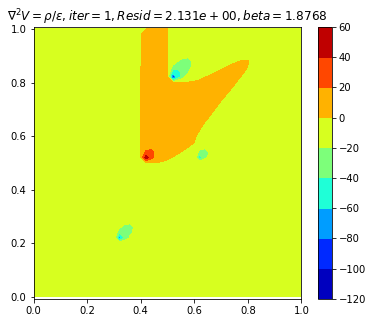

In [31]:
import numpy as np
import matplotlib.pyplot as plt
plt.close('all') #fecha figuras anteriores
plt.figure(figsize=(6,5))
Lx=1.
Ly=1.
M=51
N=51
delta=Lx/(M-1)
X=np.zeros((M,N));Y=np.zeros((M,N));ro=np.zeros((M,N))
for i in range(M):
  for j in range(N):
    X[i,j]=i*delta
    Y[i,j]=j*delta
ncargas=4 # define as cargas pontuais e sua localização
xis=[0.4,0.6,0.3,0.5];yps=[0.5,0.5,0.2,0.8];q=[1e-9,-1e-9,-1.5e-9,-2e-9];
#calcula a matriz densidade de carga
for carga in range(ncargas):
  i=round(xis[carga]/delta)+1 #; %i,j devem ser inteiros
  j=round(yps[carga]/delta)+1
  ro[i,j]=q[carga]/delta**2
#define a função forçadora na equação de Poisson (segundo membro)
eps0=8.8544e-12
f=-ro/eps0
maxiter=5000 # número máximo de iterações
maxres=1.e-8 # erro relativo
V=0*np.ones((M,N)) # %potencial na fronteira
V0=0
beta0=0 # %beta é calculado em poisson
[V,niter,res,beta]=poisson(f,V0,X,Y,maxiter,maxres,beta0)
map=plt.contourf(X,Y,V,cmap='jet') # %gráfico de isolinhas
axes = plt.gca()
axes.set_xlim([0.,Lx])
axes.set_ylim([0.,Ly])
plt.colorbar(map)
plt.axis('equal')
plt.title(r'$\nabla^{2} V=\rho/\epsilon, iter=%6i, Resid=%10.3e,beta=%8.4f $' % (niter,res,beta))
plt.show()

